In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


%matplotlib inline

In [16]:
# loans_tr 데이터를 load

loans = pd.read_csv('loans_tr.csv')

In [3]:
loans.head()

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
# Exploratory Data Aanalysis
plt.rcParams['figure.figsize'] = (15,15)

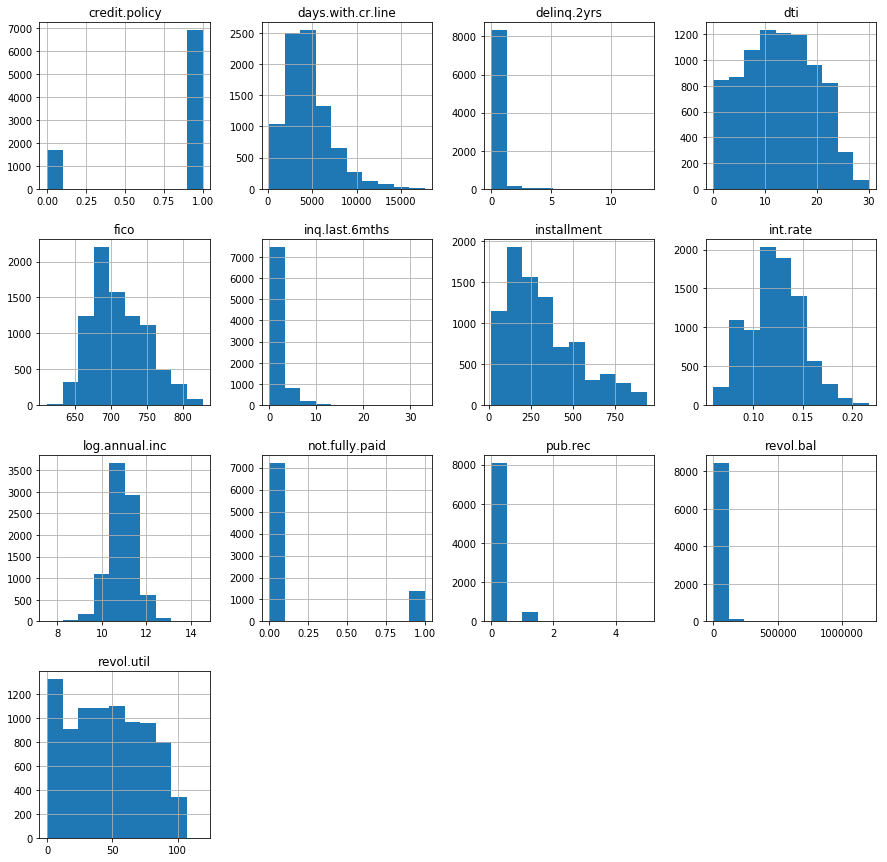

In [18]:
loans.hist()
plt.show()

In [20]:
loans.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [15]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 14 columns):
credit.policy        8578 non-null int64
purpose              8578 non-null object
int.rate             8578 non-null float64
installment          8578 non-null float64
log.annual.inc       8578 non-null float64
dti                  8578 non-null float64
fico                 8578 non-null int64
days.with.cr.line    8578 non-null float64
revol.bal            8578 non-null int64
revol.util           8578 non-null float64
inq.last.6mths       8578 non-null int64
delinq.2yrs          8578 non-null int64
pub.rec              8578 non-null int64
not.fully.paid       8578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 938.3+ KB


In [23]:
loans.shape

(8578, 13)

In [126]:
# Object type data 

In [17]:
loans = pd.get_dummies(loans)

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 21 columns):
Unnamed: 0                    8578 non-null int64
credit.policy                 8578 non-null int64
int.rate                      8578 non-null float64
installment                   8578 non-null float64
log.annual.inc                8578 non-null float64
dti                           8578 non-null float64
fico                          8578 non-null int64
days.with.cr.line             8578 non-null float64
revol.bal                     8578 non-null int64
revol.util                    8578 non-null float64
inq.last.6mths                8578 non-null int64
delinq.2yrs                   8578 non-null int64
pub.rec                       8578 non-null int64
not.fully.paid                8578 non-null int64
purpose_all_other             8578 non-null uint8
purpose_credit_card           8578 non-null uint8
purpose_debt_consolidation    8578 non-null uint8
purpose_educational           8

In [18]:
# X_data, y_data division
loans.shape

(8578, 21)

In [21]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [22]:
x_data = loans.drop('not.fully.paid', axis = 1)
y_data = loans['not.fully.paid']

In [ ]:
# train data, test data division

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 11)

In [ ]:
# Compare Algorithms - model selection

In [25]:
num_folds = 13
num_instances = len(x_train)
seed = 7
scoring = 'accuracy'

In [26]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [32]:
import warnings
warnings.simplefilter('ignore')

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_

In [ ]:
# cross validaton을 통해 optimal model selection

In [33]:
results = []
names = []

for name, model in models:
    
    kf = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv = kf, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    
    msg = "%s : %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)
    
print(results)

LR : 0.835324 (0.015426)
SVC : 0.836635 (0.015026)
KNN : 0.815651 (0.012022)
CART : 0.725298 (0.015656)
NB : 0.818420 (0.017108)
RF : 0.828473 (0.018173)
[array([0.80871212, 0.81439394, 0.86363636, 0.84848485, 0.83522727,
       0.83901515, 0.83333333, 0.81818182, 0.85416667, 0.85037879,
       0.83143939, 0.82732448, 0.83491461]), array([0.80871212, 0.81628788, 0.85795455, 0.84659091, 0.83712121,
       0.84469697, 0.84090909, 0.81818182, 0.85606061, 0.85416667,
       0.83333333, 0.82922201, 0.83301708]), array([0.8030303 , 0.78977273, 0.83333333, 0.80492424, 0.82386364,
       0.82386364, 0.82765152, 0.80871212, 0.82765152, 0.82386364,
       0.81060606, 0.81783681, 0.80834915]), array([0.73484848, 0.69507576, 0.73295455, 0.72159091, 0.71590909,
       0.73484848, 0.73674242, 0.72916667, 0.72537879, 0.70454545,
       0.75378788, 0.70588235, 0.73814042]), array([0.8030303 , 0.78409091, 0.84090909, 0.81818182, 0.81628788,
       0.8125    , 0.82575758, 0.79545455, 0.84090909, 0.84090

In [ ]:
# pipeline을 활용해서 scaling하고 optimal model selection

In [34]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVC', SVC())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))

In [35]:
pipelines

[('ScaledLR', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False))])),
 ('ScaledSVC', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False))])),
 ('ScaledKNN', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_

In [36]:
results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.836343 (0.016033)
ScaledSVC: 0.836344 (0.014933)
ScaledKNN: 0.819293 (0.021489)
ScaledCART: 0.729961 (0.013643)
ScaledNB: 0.763478 (0.020312)
ScaledRF: 0.829931 (0.012771)


In [ ]:
# ensemble 과 grid search를 활용한 model selection

In [37]:
# Tune scaled-KNN
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kf = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kf)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.835908 using {'n_neighbors': 21}


In [38]:
n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40]
max_features_set = ["sqrt", "log2", None]
param_grid = dict(n_estimators = n_estimators_set, max_features = max_features_set)
model = RandomForestClassifier()
kfold = KFold( n_splits = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.834888 using {'max_features': 'log2', 'n_estimators': 40}


In [39]:
final_pipelines = []
final_pipelines.append(('Tuned_KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier(n_neighbors = 11))])))
final_pipelines.append(('Tuned_RF', Pipeline([('RF', RandomForestClassifier(max_features = 'sqrt', n_estimators = 20))])))

In [41]:
cm = []
accuracy = []
names = []
for name, model in final_pipelines:
    model.fit(x_train, y_train)
    y_test_hat = model.predict(x_test)
    cm.append(confusion_matrix(y_test, y_test_hat))
    accuracy.append(accuracy_score(y_test, y_test_hat))
    names.append(name)

In [42]:
accuracy

[0.8548951048951049, 0.8479020979020979]

In [44]:
# final test score - test data
ts = pd.read_csv('loans_ts.csv')
ts.head()

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,8150,0,small_business,0.1299,505.34,11.407565,10.24,672,2250.000000,4162,68.4,14,0,1,1
1,7086,1,credit_card,0.1062,618.64,11.289782,13.29,737,5070.000000,14462,36.1,1,0,0,0
2,9374,0,all_other,0.1531,139.27,10.555813,8.34,667,3810.041667,1151,9.8,6,0,0,0
3,7439,1,home_improvement,0.1570,280.09,10.874266,7.36,662,4770.000000,10973,87.8,0,1,0,1
4,5345,1,credit_card,0.1531,870.39,11.727372,16.65,707,10590.000000,40413,85.6,0,0,0,0


In [48]:
ts = pd.get_dummies(ts)

x_data = ts.drop('not.fully.paid', axis = 1)
y_data = ts['not.fully.paid']

In [58]:
kfold = KFold(n_splits = num_folds, random_state = seed)
cv_results = cross_val_score(models[1][1], x_data, y_data, cv = kfold, scoring = scoring)

msg = "%s: %f (%f)" %(models[1][0], cv_results.mean(), cv_results.std())
print(msg)

SVC: 0.836046 (0.035335)
